In [1]:
import pandas as pd

In [2]:
nifty_15tf_df = pd.read_csv('./files/nifty_15minute.csv',names=["TIMESTAMP","OPEN","HIGH","LOW","CLOSE","VOLUME","DATE","WEEKDAY","CANDLE","POINTS","NET RETURN"])
nifty_15tf_df.tail(5)


,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,DATE,WEEKDAY,CANDLE,POINTS,NET RETURN
53010,2023-08-14T14:15:00+0530,19429.85,19436.80,19407.05,19421.40,0,2023-08-14,0,T14_15,-8.45,-0.04
53011,2023-08-14T14:30:00+0530,19421.10,19433.20,19418.00,19433.00,0,2023-08-14,0,T14_30,11.90,0.06
53012,2023-08-14T14:45:00+0530,19433.15,19458.45,19431.75,19458.45,0,2023-08-14,0,T14_45,25.30,0.13
53013,2023-08-14T15:00:00+0530,19459.05,19465.30,19428.90,19430.95,0,2023-08-14,0,T15_0,-28.10,-0.14
53014,2023-08-14T15:15:00+0530,19431.15,19437.10,19408.40,19413.65,0,2023-08-14,0,T15_15,-17.50,-0.09


In [3]:
nifty_15tf_df.loc[0:2]

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,DATE,WEEKDAY,CANDLE,POINTS,NET RETURN
0,2015-01-09T09:15:00+0530,8285.45,8303.00,8285.45,8294.15,0,2015-01-09,4,T9_15,8.70,0.0
1,2015-01-09T09:30:00+0530,8294.10,8295.75,8277.40,8285.55,0,2015-01-09,4,T9_30,-8.55,0.0
2,2015-01-09T09:45:00+0530,8285.40,8287.65,8273.95,8282.00,0,2015-01-09,4,T9_45,-3.40,0.0


Calculating moving Average

In [4]:
nifty_15tf_df["25_MA"] = nifty_15tf_df["CLOSE"].rolling(25).mean()
nifty_15tf_df.tail(5)

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,DATE,WEEKDAY,CANDLE,POINTS,NET RETURN,25_MA
53010,2023-08-14T14:15:00+0530,19429.85,19436.80,19407.05,19421.40,0,2023-08-14,0,T14_15,-8.45,-0.04,19365.974
53011,2023-08-14T14:30:00+0530,19421.10,19433.20,19418.00,19433.00,0,2023-08-14,0,T14_30,11.90,0.06,19365.066
53012,2023-08-14T14:45:00+0530,19433.15,19458.45,19431.75,19458.45,0,2023-08-14,0,T14_45,25.30,0.13,19364.780
53013,2023-08-14T15:00:00+0530,19459.05,19465.30,19428.90,19430.95,0,2023-08-14,0,T15_0,-28.10,-0.14,19365.384
53014,2023-08-14T15:15:00+0530,19431.15,19437.10,19408.40,19413.65,0,2023-08-14,0,T15_15,-17.50,-0.09,19364.960


Flag Identifing if the return on T09_30 candle is green or red

In [5]:
nifty_15tf_df["T9_30_color"] = nifty_15tf_df["NET RETURN"].apply(lambda x: True if x>=0.0 else False)
nifty_15tf_df["T9_30_color"].tail()

53010    False
53011     True
53012     True
53013    False
53014    False
Name: T9_30_color, dtype: bool

In [6]:
nifty_15tf_df.tail(5)

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,DATE,WEEKDAY,CANDLE,POINTS,NET RETURN,25_MA,T9_30_color
53010,2023-08-14T14:15:00+0530,19429.85,19436.80,19407.05,19421.40,0,2023-08-14,0,T14_15,-8.45,-0.04,19365.974,False
53011,2023-08-14T14:30:00+0530,19421.10,19433.20,19418.00,19433.00,0,2023-08-14,0,T14_30,11.90,0.06,19365.066,True
53012,2023-08-14T14:45:00+0530,19433.15,19458.45,19431.75,19458.45,0,2023-08-14,0,T14_45,25.30,0.13,19364.780,True
53013,2023-08-14T15:00:00+0530,19459.05,19465.30,19428.90,19430.95,0,2023-08-14,0,T15_0,-28.10,-0.14,19365.384,False
53014,2023-08-14T15:15:00+0530,19431.15,19437.10,19408.40,19413.65,0,2023-08-14,0,T15_15,-17.50,-0.09,19364.960,False


**T9_30** Candle analysis

In [7]:
nifty_15tf_df[nifty_15tf_df["CANDLE"] == "T9_30"].tail(5)

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,DATE,WEEKDAY,CANDLE,POINTS,NET RETURN,25_MA,T9_30_color
52891,2023-08-08T09:30:00+0530,19604.55,19609.00,19578.90,19592.85,0,2023-08-08,1,T9_30,-11.70,-0.06,19575.832,False
52916,2023-08-09T09:30:00+0530,19525.25,19528.60,19501.85,19505.25,0,2023-08-09,2,T9_30,-20.00,-0.10,19569.282,False
52941,2023-08-10T09:30:00+0530,19583.40,19602.90,19571.20,19590.45,0,2023-08-10,3,T9_30,7.05,0.04,19524.244,True
52966,2023-08-11T09:30:00+0530,19490.65,19498.75,19465.60,19476.35,0,2023-08-11,4,T9_30,-14.30,-0.07,19545.028,False
52991,2023-08-14T09:30:00+0530,19288.40,19308.30,19258.20,19304.80,0,2023-08-14,0,T9_30,16.40,0.09,19446.368,True


<Axes: xlabel='WEEKDAY', ylabel='POINTS'>

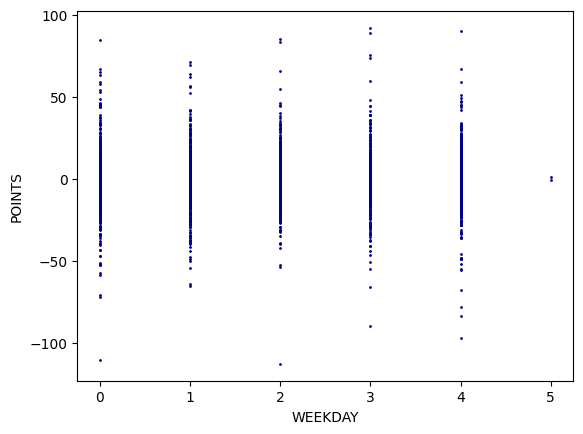

In [8]:
nifty_15tf_df[nifty_15tf_df["CANDLE"] == "T9_45"].plot.scatter(x="WEEKDAY",y = "POINTS",c='DarkBlue',s= 1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1972\2939568390.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nifty_15tf_df[nifty_15tf_df["POINTS"]>-100][nifty_15tf_df["POINTS"] <100][nifty_15tf_df["CANDLE"] == "T9_30"].hist(column=["POINTS"],  figsize=(50,15),ylabelsize=20,xlabelsize=30,bins=500)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1972\2939568390.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nifty_15tf_df[nifty_15tf_df["POINTS"]>-100][nifty_15tf_df["POINTS"] <100][nifty_15tf_df["CANDLE"] == "T9_30"].hist(column=["POINTS"],  figsize=(50,15),ylabelsize=20,xlabelsize=30,bins=500)


array([[<Axes: title={'center': 'POINTS'}>]], dtype=object)

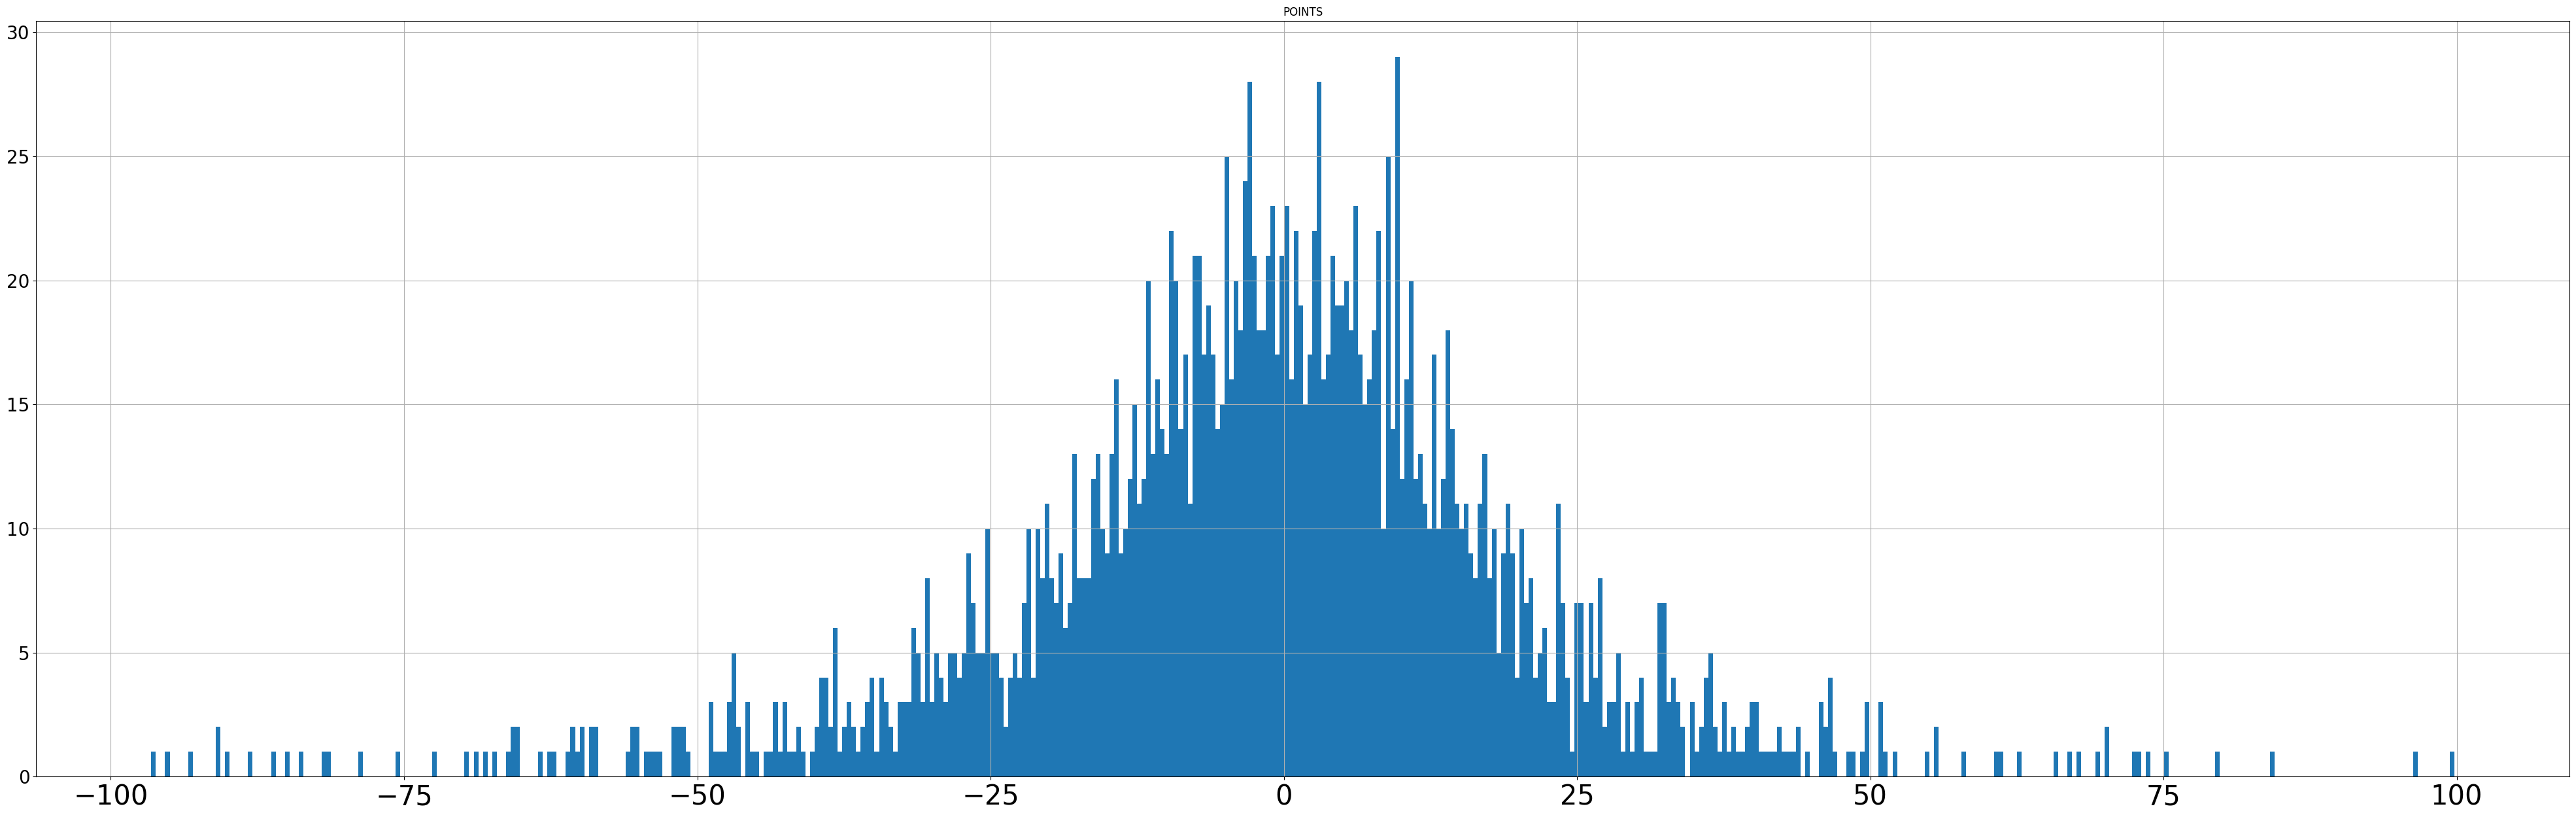

In [9]:
# nifty_15tf_df.hist(column=["POINTS","WEEKDAY"],  figsize=(5,5))
nifty_15tf_df[nifty_15tf_df["POINTS"]>-100][nifty_15tf_df["POINTS"] <100][nifty_15tf_df["CANDLE"] == "T9_30"].hist(column=["POINTS"],  figsize=(50,15),ylabelsize=20,xlabelsize=30,bins=500)
# nifty_15tf_df.hist(column=["POINTS","WEEKDAY"],  figsize=(5,5),xlabelsize=10,ax = np.arange(-200,200,1))